In [1]:
from settings import s, e
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
import pickle

from IPython.display import HTML, clear_output, display, update_display
import matplotlib.pyplot as plt


from simple import Game, get_valid_actions

from agent_code.tensor_agent.agent import TensorAgent
from agent_code.tensor_agent.hyperparameters import hp
from agent_code.tensor_agent.X import RelativeX3 as game_state_X
from agent_code.tensor_agent.X import AbsoluteX3, X3_to_imgs
from agent_code.tensor_agent.model import FullModel, Counter

choices = ['RIGHT', 'LEFT', 'UP', 'DOWN', 'BOMB', 'WAIT']
action_y_map = {choices[i]: i for i in range(len(choices))}
D = len(choices)

clear_output()

In [2]:
from PIL import Image

In [3]:
game = Game(*Game.create_arena(['test', 'test1', 'test2', 'test3']))

In [4]:
def move(direction):
    game.step({
        'test': direction,
        'test1': 'WAIT',
        'test2': 'WAIT',
        'test3': 'WAIT'
    })

In [5]:
move('UP') # left in img

In [6]:
move('DOWN') # right in img

In [7]:
move('RIGHT') # down in img

In [8]:
move('LEFT') # up in img

In [9]:
move('BOMB')

In [10]:
move('WAIT')

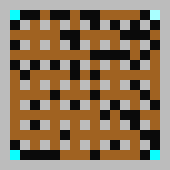

In [22]:
game_state = game.get_game_state(game.agents[0])
X = AbsoluteX3.get(game_state)
#X[s.cols-1, s.rows-1] = 1
imgs, combined = X3_to_imgs(X, whitening=0)
Image.fromarray(np.uint8(np.clip(combined*255 + 10, 0, 255))).resize((17*10,17*10))

In [16]:
for i in range(len(imgs)):
    imgs[i].save(f'tex/images/X_channel-{i}.png')

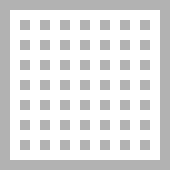

In [23]:
imgs[0]

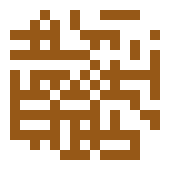

In [24]:
imgs[1]

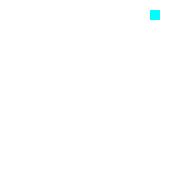

In [11]:
imgs[2]

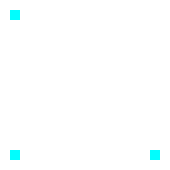

In [12]:
imgs[3]

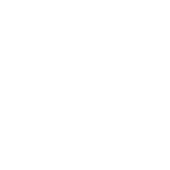

In [13]:
imgs[4]

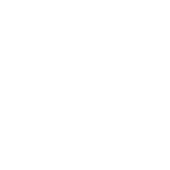

In [14]:
imgs[5]

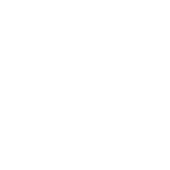

In [15]:
imgs[6]

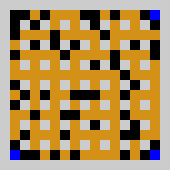

In [154]:
Image.fromarray(np.uint8(combined*255)).resize((17*10,17*10))

In [ ]:
def prepare_img(img):
    t = np.array(img)
    t[:,:,3] = np.clip(t[:,:,3], 70, 255)
    t[t[:,:,3] == 70, 0:3] = 230
    grid_alpha = 70
    t[::10, :] -= 10#= [0, 0, 0, grid_alpha]
    t[9::10, :] -= 10#= [0, 0, 0, grid_alpha]
    t[:, ::10] -= 10#= [0, 0, 0, grid_alpha]
    t[:, 9::10] -= 10#= [0, 0, 0, grid_alpha]
    t[[0, -1], :] = [0, 0, 0, 200]
    t[:, [0, -1]] = [0, 0, 0, 200]
    return Image.fromarray(np.uint8(np.clip(np.array(t), 0, 255))).resize((17*10,17*10))


In [ ]:
images = []
for i in range(7):
    t = prepare_img(Image.open(f'tex/images/X_channel-{i}-raw.png'))
    cx = 0
    cy = 0.5
    sheared = t.transform(
        (300, 300),
        method=Image.AFFINE,
        data=[1, cx, 0,
              cy, 1, -90,])
    images.append(sheared)

new_im = Image.new('RGBA', (382, 265))

x_offset = 0
for im in images:
    new_im.paste(im, (x_offset,0), im)
    x_offset += 35

new_im